## Final comparison

* import accuracy results from all estimators

In [1]:
%store -r baseline_accuracy
%store -r knn_accuracy
%store -r dt_pca_score_test
%store -r logistic_test_score
%store -r randomforest_test_score
%store -r svm_linear_test
%store -r svm_rbf_test
%store -r dense_1layer_accuracy
%store -r dense_2layers_accuracy
%store -r test_acc

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = {'model':['Dummy','k-NN','Decision Tree','Logistic Regression','RandomForest','SVM Linear','SVM RBF','Dense 1-layer','Dense 2-layers','ConvNet'],\
        'test_accuracy':[baseline_accuracy, knn_accuracy, dt_pca_score_test, logistic_test_score, randomforest_test_score, svm_linear_test, svm_rbf_test, dense_1layer_accuracy, dense_2layers_accuracy, test_acc]}
df_accuracy = pd.DataFrame(data)

In [4]:
df_accuracy

,model,test_accuracy
0,Dummy,0.23741
1,k-NN,0.90000
2,Decision Tree,0.82000
3,Logistic Regression,0.94000
4,RandomForest,0.88000
5,SVM Linear,0.92000
6,SVM RBF,0.94000
7,Dense 1-layer,0.92000
8,Dense 2-layers,0.88000
9,ConvNet,0.50000


In [5]:
df_acc_sorted = df_accuracy.sort_values(by='test_accuracy',ascending=False)

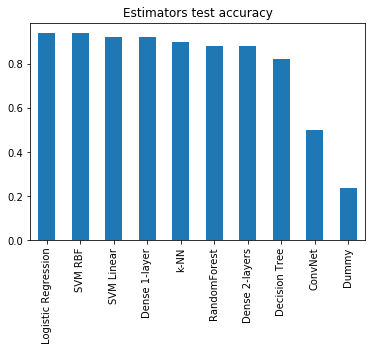

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df_acc_sorted['test_accuracy'].plot(kind='bar', legend=None)
plt.xticks(ticks=np.arange(0,10),labels=df_acc_sorted['model'])
plt.legend().set_visible(False)
plt.title('Estimators test accuracy')
plt.show()

### Comments:
* Logisitc Regression, SVM RBF and Dense 1-layer all reached the highest accuracy on test sets with 94%
* Decision Tree (even with PCA pre-processing steps) performs below other etimators for this task
* ConvNet model built from sratch wasn't able to reach comparable performance to other estimators based on high-level features

## Final comments from Instructors (Mohammad Dia)

Hello Grégoire,

Thanks for submitting your project. You have implemented all the required tasks and reached the expected performance results! Bravo. Furthermore, you have provided well-documented notebooks and carefully justified your decisions.

In this project, you have shown your skills in using TensorFlow hub pre-trained models to extract features, running and comparing several models on the extracted features, building your own CNN, in addition to hyperparameter tuning. Below are some further comments on your submission and some answers to the questions you have raised:

**Task 1:**

* Instead of using for loops in cells 7-11, you can use the next() method (e.g. features, targets = trainset.next()) to extract the features and labels from an ImageDataGenerator after setting the batch_size to the size of each set in cells 3-4.
* Data augmentation enriches or augments, the training data by sampling new images based on the already existing ones (by rotating, flipping,….). So it does not create totally new images from scratch, it simply transforms the existing ones. Data augmentation can help in some specific datasets and ML tasks to improve performance, but this depends on the data and ML model. I refer you to a question asked by "green-shades" in the unit "Advanced Keras" (C4/S9/U2), the answer there has some more details. Note that in this feature extraction task, the data augmentation is not in action because you did not train any model. Although you have set horizontal_flip=True, rotation_range=5, this has no effect as long you did not fit a Keras model.
* You can initiate separate sessions for extraction. Note that since you are not fitting any model here (we are just extracting/predicting features from the pre-trained model), you can also concatenate all the sets and extract features at once then split.

**Task 2:**

* It is not wrong to scale before PCA, but this might not be needed (check comments on Task 3).
* Ideally, you should only fit on the training data set.

**Task 3:**

* Very good tuning and well done using the Pipeline!
* You have already scaled the pixels to range 0-1 before passing it to the Inception Net and extracting high-level features. The scaling after feature extraction might not be useful here (unless you have a good reason to do that). On the contrary, scaling the extracted features might affect the quality of the prediction. The range and scale of the extracted features learned by the model can hold some information that we don't need to remove. The effect is not significant here, but this is just for your further info: no scaling is required in tasks 3-7, only at the raw pixel levels in tasks 1 and 8. Moreover, scaling in a tree-based method is not required even in the more general cases. You could have considered the scaling as one of the hyperparameters if you want and check its effect.
* There is no need to define and fit a NearestNeighbors search object to find the 10 neighbors, you can simply use the KNeighborsClassifier which was already trained, and apply the kneighbors method on top of it.

**Task 4:**

* No further scaling is needed in this special case because we are working on the extracted features. Furthermore, decision trees and random forests do not need scaling in general (only distance-based and gradient-based methods do).
* For all preprocessing methods (scaling, PCA), the fit method should only be applied on the train set. If the train set is transformed, then the validation and test should also be transformed but without fitting on them.

**Task 5:**

* Well done! Same comments on scaling above.
* The effect of "C" on the probabilities should be further investigated. The idea is to check very very small "C". For such values of "C" (i.e. for very high regularization, remember "C" represents the inverse of the regularization strength in sklearn.), the probabilities become smoother, or less opinionated. This means the probabilities converge to 
1
/
6
 in this case.
* You can tune as many hyperparameters as you want. The requirement in this question is just for "C".
* You can use set_params if you want.

**Task 6:**

* No scaling needed in general for the random forest.
* You can still apply cross-validation or standard grid search with a validation set to estimate the performance of the test data. Although random forest is expected to have less overfitting than decision trees, you might always need to estimate the test performance and you can not only rely on the train performance.
* The high train accuracy is indeed because of overfitting.
* Gamma equals 1 is not a typical value for RBF kernel, that is why it does not perform well. You can keep the default Gamma.
* You can indeed use GridSearchCV. The reason we did not ask them in this task is just to avoid repetition of assessing the same skills (it is already assessed in Task 5).

**Task 7:**

* Good use of keras API!
* The activation function in the hidden layer is relu. However, the one for the output layer depends on the task. In this multi-class classification exercise, it should be softmax. Hence, a single layer NN should have a softmax. Your current implementation is the correct one.
* You are not supposed to fix all the randomness here. However, you can do so if you want by seeding all the sources of randomness (split, initializers,…). For that, I refer you to a question asked by "lalala_didi" in unit "Image classifier" (C4/S11/U2), the answer there has some more details.
* The number of units in the hidden layer can be seen as a hyperparameter. If you want to optimize it, you can perform a grid search on it. However, this is not required here. The number of units of the output layers in multi-class classification problems is always equal to the number of classes. It should be 6 in this case.
* Having a lower test performance can be a sign of overfitting because we have increased the complexity of the model.

**Task 8:**

* Nice use of low-level TensorFlow graph. You could have also used high-level Keras to build the CNN as done in Task 7.
* Good interpretation of the poor CNN performance. The idea here is to show the limitation of training CNN from scratch with small data compared to doing feature extraction with pre-trained models such as mobilenet or inceptionnet (which is originally trained on the ImageNet dataset with 1.2 million images). The CNN could have performed better should we had much more data.
* All the parameters of the CNN can be tuned. Typical choices are kernel size 3, stride 2. The size of the picture does indeed have an impact. For that, I refer you to a question asked by "random" in the unit "Solution - CIFAR-10 CNN" (C4/S8/U7), the answer there has some more details.
* In TF1 you can not use both graph and Keras model together. You should stick to one on them.
* The number of neurons in a fully connected layer is also a hyper-parameter. There is no definite number for all the problems. The number of layers is also a hyper-parameter. Note that the architecture is already complex enough for a small dataset like this ( the bottleneck is the data, not the model as explained above), adding more layers might not help.
* In the last section of cell 9, you can pass any output defined in the graph in sess.run() to track it, not only the accuracy.

**Congratulations on finishing the fourth project and good luck with your capstone.**

All the best!